In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Only from Colab
#from google.colab import drive
#drive.mount('/content/gdrive/')

# ACSE Module 8 - Practical - Morning Session 1:
----
# Linear Regression, Logistic Regression, k-Means, PCA

## Task 1: Candy Evaluation Dataset - Linear Regression

You work at a large marketing company and one of your clients is thinking about producing a new candy-bar.  
They would like to figure out which ingredients contribute most to the overall popularity of a candy bar to guide their food-experts.  
To do so they've performed a study of how popular each brand of candy-bar is by asking people to choose 1 out of three bars.  
The popularity is measured in ```winpercent``` how often a specific candy bar was chosen as the winner of three.  
They've sent you the dataset, try to answer the following questions:  
- How many candy-bars were evaluated?
- How many features / columns of data do you have per candy-bar?
- How many of these are likely to be ingredients?
- Are there any datapoints that seem odd to you? If yes, drop them.
- Give a ranked list of candy bars with respect to ```winpercent```
- Give a ranked list of ingredients (top occurences to lowest occurence)
- Create a pearson correlation matrix
- Choose a model to represent the relationship between ingredients and ```winpercent```
- The client wants to know the most important ingredient. What recommendation do you give him?
- What's the most-likely winpercent of a franken-bar (contains all ingredients)?
- Is this reasonable?

### 1.1 Loading the data
The following link contains a GDrive of the data used for this exercise.
Make it available in your drive.

[ACSE-Data](https://drive.google.com/drive/folders/1ykkRE0I-BFtbk1IfskiG0oOOQ2nd83n4?usp=sharing)

In [3]:
#Locally
data = pd.read_csv("./candy_data.csv", index_col="competitorname")

#From Colab
#data = pd.read_csv(F"/content/gdrive/My Drive/acse-data/candy_data.csv", index_col="competitorname")

In [4]:
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### 1.2: How many candy-bars were evaluated?

In [5]:
print(len(data.index))

85


### 1.3: How many features do you have?

In [6]:
print(data.columns.tolist())

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']


### 1.4: Are there any datapoints that seem odd to you?

In [7]:
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


There is a ```One dime``` and ```One quarter``` candy bar in the dataset.

In [8]:
data = data.drop(['One dime', 'One quarter'], axis='index')
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547


### 1.5: Give a ranked list of candy bars with respect to ```winpercent```

In [9]:
data.sort_values("winpercent", ascending=False).head(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050


In [10]:
data.sort_values("winpercent", ascending=True).head(10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


### 1.6: Give a ranked list of ingredients (top occurences to lowest occurence)

In [11]:
data[["chocolate", "fruity", "caramel","peanutyalmondy","nougat","crispedricewafer"]].sum(axis=0).sort_values(ascending=False).head(10)

fruity              38
chocolate           37
peanutyalmondy      14
caramel             14
crispedricewafer     7
nougat               7
dtype: int64

### 1.7: Create a pearson correlation matrix

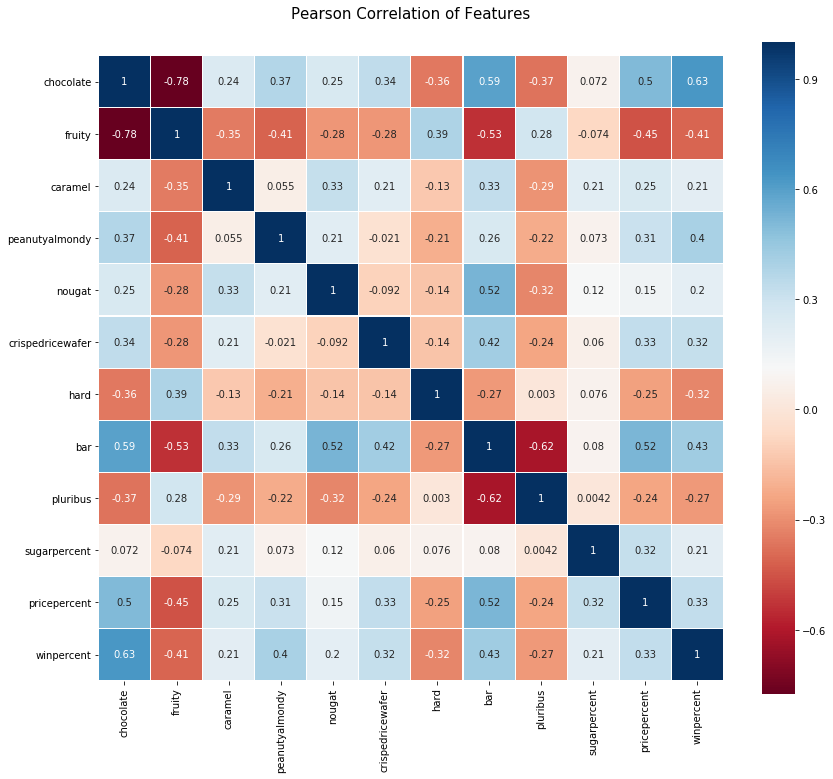

In [12]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### 1.8: Choose a model to represent the relationship between ingredients and ```winpercent```

We will use a simple linear model to predict the ```winpercent``` given the binary ingredient indicators.

$$winpercent = \sum_{ingredients}{\theta_i \cdot x_i}$$

### 1.9: The client wants to know the most important ingredient. What recommendation do you give him?

We will use the scikit-learn library to perform linear regression.

You can use the ```yourmodel.coef_``` to obtain regression coefficients.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X = data[["chocolate", "fruity", "caramel","peanutyalmondy","nougat","crispedricewafer"]]
y = data[["winpercent"]]

In [15]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_ = model.predict(X)

In [16]:
print(model.coef_)

[[47.71567898 42.52245445 12.98122591 18.46506543  3.82128317 10.25332399]]


Chocolate seems to be contributing on average the most to the total win-percent!  
We will recommend this to our client.

### 1.10: What's the most-likely winpercent of a franken-bar (contains all ingredients)?

In [17]:
franken_bar = np.ones((1 ,6))
print("Frankenbar winpercent %1.2f"%model.predict(franken_bar))

Frankenbar winpercent 135.76


### 1.11: Is this Reasonable?

Well clearly it is not. Aside from the fact that our model predicts a higher than 100 percent for a bar containing all ingredients. It is unlikely that simply stuffing all ingredients in one bar tastes good. For this we would need to also take into account the covariation of the ingredients to see which combinations are most popular.

----

# Dimensionality Reduction - Principal Component Analysis (PCA)

In the following exercise you will implement your own version of a principal component analysis:
You will need to perform the followin steps and answer the following questions:
## Task 2: Implementing your own PCA

- 2.1: We've provided you a dataset $X_{raw}$ of noisy measurements. Matrix shape (N_data_points x p_features)
- 2.2: Obtain the mean of the features and subtract to obtain a centered feature set $X$ Matrix shape (N_data_points x p_features)
- 2.3: Compute the covariance $Cov$ of the features. Use numpy.cov to obtain the covariance matrix. Matrix Shape (p_features x p_features) 
- 2.4: Compute the eigenvalues and eigenvectors $V$ of the covariance matrix.
- 2.5: Create a graph of the centered data with arrows pointing in the direction of the principal components
- 2.6: Compute and plot the transformed data with all principal components $X_{pca}=XV$
- 2.7: Keep only the largest eigenvector and reconstruct the data $X_{pca^{max}}=XVV^T$
- 2.8: Compare your solution $X_{pca}$ to the output of using ```sklearn.decomposition.PCA```

### 2.1 The noisy linear dataset $X_{raw}$ of noisy measurements.

In [18]:
np.random.seed(0)

x = np.linspace(0, 1, 100)
y_gt = np.pi+x
y = y_gt + np.random.normal(0, 0.1, (100)) 
X_raw = np.stack([x, y], 1)
print(X_raw.shape)

(100, 2)


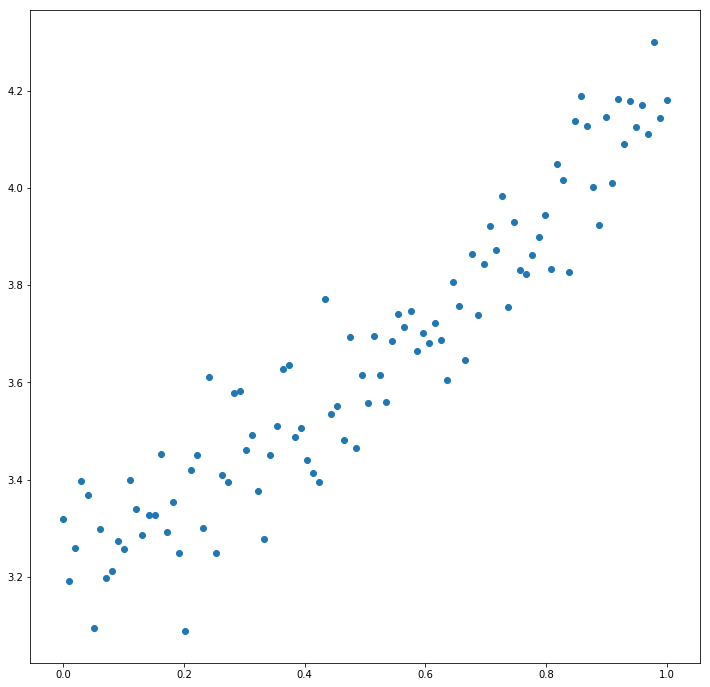

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(x, y)

### 2.1: Obtain the mean of the features and subtract

(100, 2)


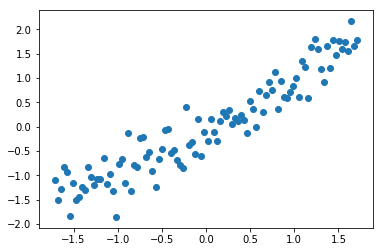

In [20]:
mean = np.mean(X_raw, 0)
std = np.std(X_raw, 0)
X = (X_raw-mean)/std
print(X.shape)
plt.scatter(X[:, 0], X[:, 1])

### 2.2: Compute the covariance $Cov$ of the features.

In [21]:
C = np.dot(X.T, X)/(X.shape[0]-1)
print(C)

[[1.01010101 0.95191722]
 [0.95191722 1.01010101]]


### 2.3: Compute the eigenvalues and eigenvectors $V$

In [22]:
evals , evecs = np.linalg.eig(C)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]
print(evecs)
print(evals)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[1.96201823 0.05818379]


### 2.4: Create a graph of the centered data with arrows pointing in the direction of the principal components

(-1, 1)

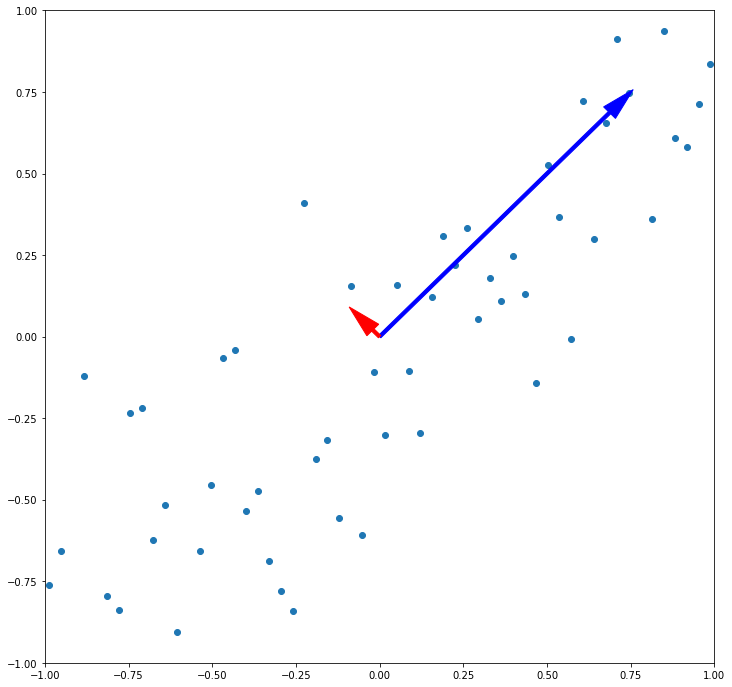

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
width, head_width, head_length = 0.01, 0.05, 0.1
arrow_scale = 1.0
scale = arrow_scale*evals/np.sum(evals)

for i, c in zip(range(2), ["blue", "red"]):
    plt.arrow(0, 0, scale[i]*evecs[0, i], scale[i]*evecs[1, i], width=width, head_width=head_width, head_length=head_length, color=c)

ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

### 2.5: Compute and plot the transformed data with all principal components $X_{pca}=XV$

(100, 2)


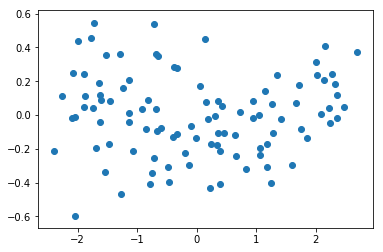

In [24]:
X_ = np.matmul(X, evecs)
print(X_.shape)
plt.scatter(X_[:, 0], X_[:, 1])

### 2.6: Compare your solution $X_{pca}$ to the output of using ```sklearn.decomposition.PCA```

In [25]:
from sklearn.decomposition import PCA

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[1.96201823 0.05818379]


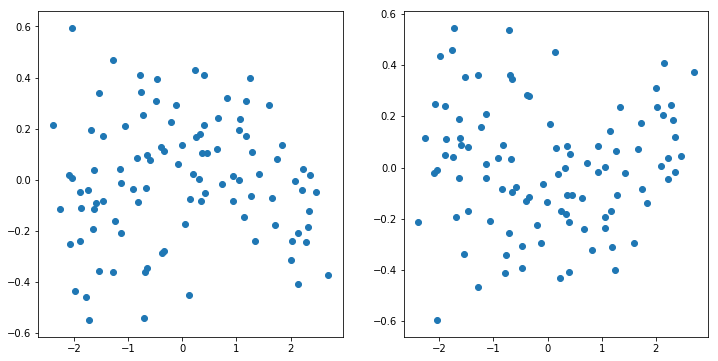

In [26]:
pca_model = PCA()
pca_model.fit(X)
print(pca_model.components_)
print(pca_model.explained_variance_)
reduced_sk = pca_model.transform(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(reduced_sk[:, 0], reduced_sk[:, 1])
ax[1].scatter(X_[:, 0], X_[:, 1])


## Task 3: PCA as a dimensionality reduction and exploratory data analysis tool (EDA)
- 3.1: Load the breast cancer dataset ```from sklearn.datasets import load_breast_cancer```
- 3.2: Create a two-component PCA projection using sklearn's PCA implementation and plot on a graph using ```plt.scatter```. Make the color equal to the binary set of classes.
- 3.3: Is there a benefit of performing PCA here? What type of classifier would perform well on this dataset?
- 3.3: Fit a linear classifier using ```sklearn.linear_model.SGDClassifier``` and prove your hypothesis using an accuracy score

### 3.1: Load the breast cancer dataset ```from sklearn.datasets import load_breast_cancer```

In [27]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

### 3.2: Create a two-component PCA projection using sklearn's PCA implementation and plot on a graph using ```plt.scatter```. Make the color equal to the binary set of classes.


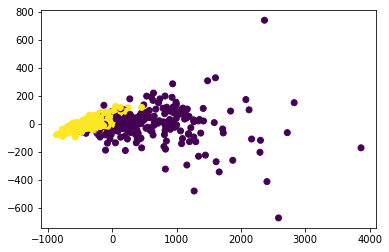

In [28]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

###  3.3:  Is there a benefit of performing PCA here? What type of classifier would perform well on this dataset?
It looks like a simple linear model would perform quite well at seperating the two classes!

### 3.4: Fit a linear classifier using ```sklearn.linear_model.SGDClassifier``` and prove your hypothesis using an accuracy score

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

clf = SGDClassifier()
clf.fit(X_pca, y)

y_pred = clf.predict(X_pca)
print(y_pred)
print("Accuracy: %2.1f percent" % (accuracy_score(y, y_pred)*100))

[0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 0 

/home/lm715/anaconda2/envs/dlenv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


---

## Task 4: K-Means Clustering Exercise

### 4.1: Fit k-Means clusters to the PCA'd cancer dataset and plot the resulting clusters and their centers
Careful k-Means doesn't care about your labels therefore you may need to "flip" your labels to get reasonable predictions.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=13)
clf.fit(X_pca)
print(clf.cluster_centers_)
y_pred = 1-clf.fit_predict(X_pca, y)
print("Accuracy: %2.1f percent" % (accuracy_score(y, y_pred)*100))

[[-3.06510219e+02 -4.74773896e-01]
 [ 1.02482043e+03  1.58741196e+00]]
Accuracy: 85.4 percent


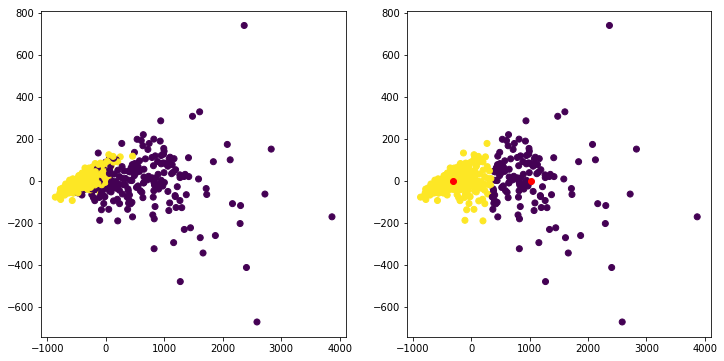

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
ax[1].scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], c="red")

---

## Task 5: Logistic Regression Exercise
In the following exercise we will use LogisticRegression as a simple "black-box" model
to outperform our previous classifiers, the linear classifier and the k-Means classifier.

Our baseline classifier - the k-Means algorithm performed at 85%. Let's see if we can improve on that.
To do so we will use sklearn's ```sklearn.linear_model.LogisticRegression``` class.

- 5.1: Import the logistic regression module and the ```sklearn.model_selection.StratifiedShuffleSplit``` class
- 5.2: Create a new logistic regression classifier and overfit to the whole dataset with default values. How good does this model perform on the training set?
- 5.3: Use the ```StratifiedShuffleSplit``` to create a 50/50 train test split.
- 5.4: For the given split evaluate the impact of the regularization strength factor C:
    - Choose values of C on a log10 scale \[0.001, 0.01, ..., 10\]
    - For each value of C perform the following task and evaluate the accuracy on train and test sets
        1. Scale the data using ```StandardScaler```
        2. Fit a logistic regression classifier to the training data
        3. Evaluate the accuracy on the training set
        4. Evaluate the accuracy on the test set
        5. Store both accuracies in an array
    - Plot regularization strength vs. Test and Train Accuracy on a log scale. Which factor of C do you choose?
    - Can you identify Bias vs. Variance?
    

### 5.1: Import the logistic regression module and the sklearn.model_selection.StratifiedShuffleSplit class

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

### 5.2: Create a new logistic regression classifier and overfit to the whole dataset

In [33]:
X_pre = StandardScaler().fit_transform(X)
clf = LogisticRegression()
clf.fit(X_pre, y)
y_pred = clf.predict(X_pre)
print("Accuracy: %2.1f percent" % (accuracy_score(y, y_pred)*100))

Accuracy: 98.8 percent


/home/lm715/anaconda2/envs/dlenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 5.3: Use the StratifiedShuffleSplit to create a 50/50 train test split.

In [34]:
indices = StratifiedShuffleSplit(test_size=0.5, random_state=0).split(X, y)
train_index, test_index = list(indices)[0]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

### 5.4: For the given split evaluate the impact of the regularization strength factor C

In [35]:
Cs = [0.001, 0.01, 0.1, 1., 10] #Range of C to evaluate

train_test_accs = []
for C in Cs:
    scaler = StandardScaler().fit(X_train) #Fit and instantiate our Standard scaler: data has now 0 mean and 1 variance
    X_train_pre = scaler.transform(X_train) #Transform our training split

    clf = LogisticRegression(C=C, solver="lbfgs") #Create a LogisticRegression object from sklearn
    clf.fit(X_train_pre, y_train) #Fit the classifier
    y_train_ = clf.predict(X_train_pre) #Predict on the training set
    
    X_test_pre = scaler.transform(X_test) #Transform the test set
    y_test_ = clf.predict(X_test_pre) #Predict on the test set
    
    #Use accuracy_score to get accuracy
    train_acc, test_acc = accuracy_score(y_train, y_train_)*100, accuracy_score(y_test, y_test_)*100
    train_test_accs.append([train_acc, test_acc])
    
    print("Regularization Strength: ", C, 
          " Train Accuracy: %2.1f percent" % train_acc,  
          " Val. Accuracy: %2.1f percent" % test_acc)
train_test_accs = np.array(train_test_accs)

Regularization Strength:  0.001  Train Accuracy: 86.6 percent  Val. Accuracy: 86.3 percent
Regularization Strength:  0.01  Train Accuracy: 95.1 percent  Val. Accuracy: 94.7 percent
Regularization Strength:  0.1  Train Accuracy: 97.9 percent  Val. Accuracy: 97.5 percent
Regularization Strength:  1.0  Train Accuracy: 98.9 percent  Val. Accuracy: 97.9 percent
Regularization Strength:  10  Train Accuracy: 98.9 percent  Val. Accuracy: 96.8 percent


### 5.4: Plot regularization strength vs. Test and Train Accuracy on a log scale. Which factor of C do you choose?

Text(0.5, 0, 'C = Inverse of Regularization Strength')

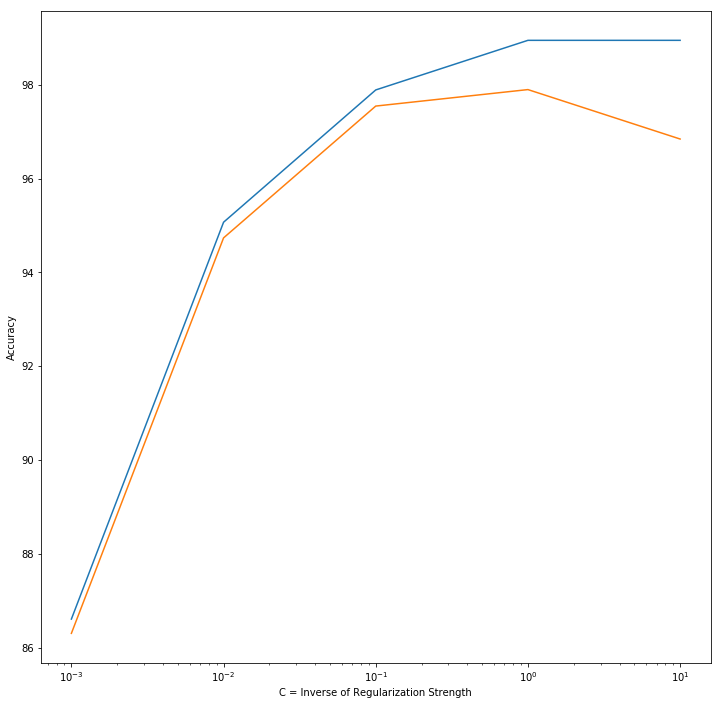

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.plot(Cs, train_test_accs[:, 0])
ax.plot(Cs, train_test_accs[:, 1])
ax.set_xscale("log")
ax.set_ylabel("Accuracy")
ax.set_xlabel("C = Inverse of Regularization Strength")

I would choose a value of C=1 as it leads to the highest overall accuracy on the _test set_.

### 5.4: Can you identify Bias vs. Variance?
Small values of the regularization strength factor C lead to bias which can be seen as the model underfits to the data.   
Whereas high values lead to a decrease in the accuracy on the test set i.e. the model is overfit - variance.